In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv


In [2]:
df = pd.read_csv(path)
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [3]:
X = df.drop(columns = ['crop_yield']).values
y = df['crop_yield'].values

In [4]:
mean_vector = np.mean(X, axis = 0)
z = X - mean_vector
covariance_matrix = (1/(z.shape[0] - 1))*(z.T@z)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

In [5]:
fin_proj = z@sorted_eigenvectors[:,:2]

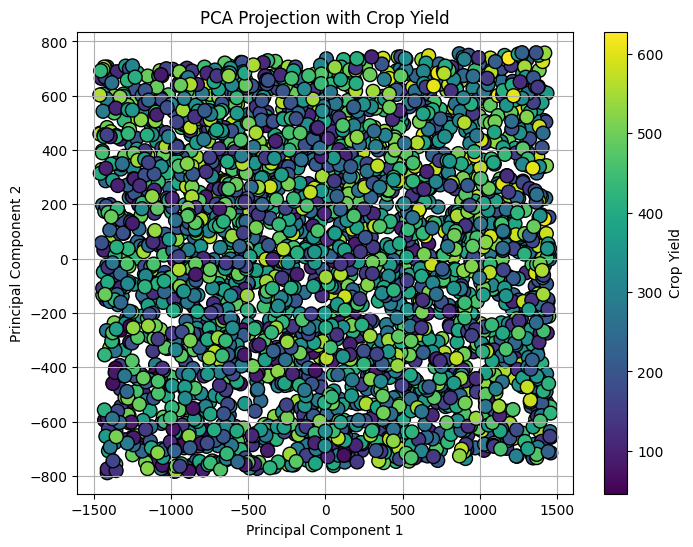

In [6]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(fin_proj[:, 0], fin_proj[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(scatter, label='Crop Yield')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Crop Yield')
plt.grid(True)
plt.show()

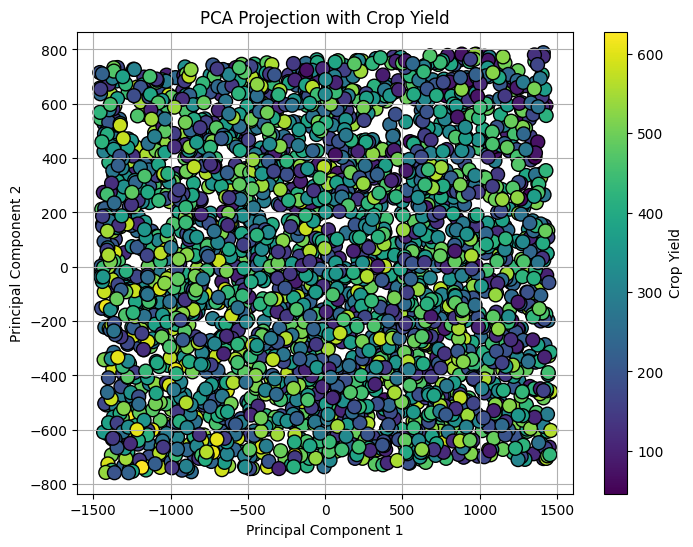

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Choose the number of components
pca.fit(X)
fin_proj = pca.transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(fin_proj[:, 0], fin_proj[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(scatter, label='Crop Yield')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Crop Yield')
plt.grid(True)
plt.show()